In [2]:
#importing all the necessary libraries

import numpy as np
import matplotlib.pyplot as plt
import os
import cv2 as cv
import random

In [3]:
#load a single image from the bacteria folder

def load_image(bacteria_path):
    for img in os.listdir(bacteria_path):
        print('Image name =',img)
        image = cv.imread(os.path.join(bacteria_path, img))
        break

    return image


Image name = person1000_bacteria_2931.jpeg
The dimensions are 760 pixels height and 1152 pixels width
The maximum pixel value is 255.0000
The minimum pixel value is 0.0000
The mean value of the pixels is 114.5373
The standard deviation is 56.2341


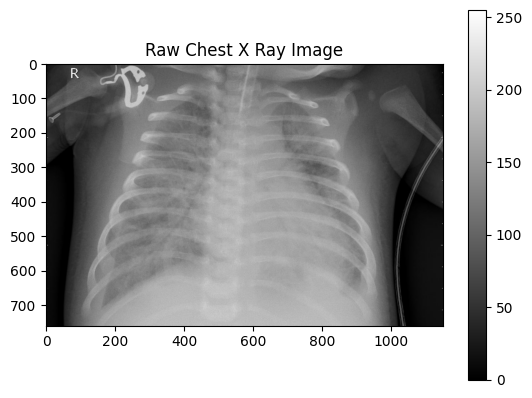

In [4]:
# Investigate a single image

bacteria_path = 'C:/Users/Quang/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray/train/2_BACTERIA'

image = load_image(bacteria_path)
plt.imshow(image, cmap='gray')
plt.colorbar()
plt.title('Raw Chest X Ray Image')
print(f"The dimensions are {image.shape[0]} pixels height and {image.shape[1]} pixels width")
print(f"The maximum pixel value is {image.max():.4f}")
print(f"The minimum pixel value is {image.min():.4f}")
print(f"The mean value of the pixels is {image.mean():.4f}")
print(f"The standard deviation is {image.std():.4f}")

Image name = person1000_bacteria_2931.jpeg
The dimensions are 760 pixels height and 1152 pixels width
The maximum pixel value is 255.0000
The minimum pixel value is 0.0000
The mean value of the pixels is 114.5373
The standard deviation is 56.2341


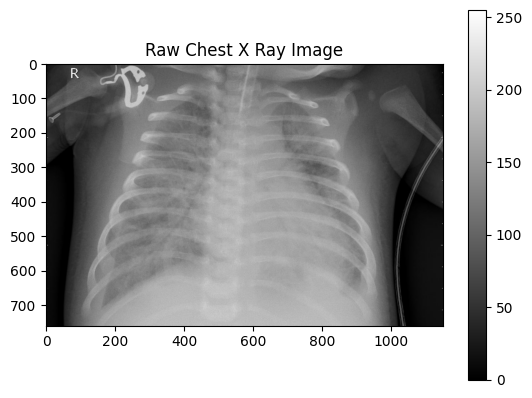

In [8]:
# Investigate a single image

bacteria_path = 'C:/Users/nerik/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray/train/2_BACTERIA'

image = load_image(bacteria_path)
plt.imshow(image, cmap='gray')
plt.colorbar()
plt.title('Raw Chest X Ray Image')
print(f"The dimensions are {image.shape[0]} pixels height and {image.shape[1]} pixels width")
print(f"The maximum pixel value is {image.max():.4f}")
print(f"The minimum pixel value is {image.min():.4f}")
print(f"The mean value of the pixels is {image.mean():.4f}")
print(f"The standard deviation is {image.std():.4f}")

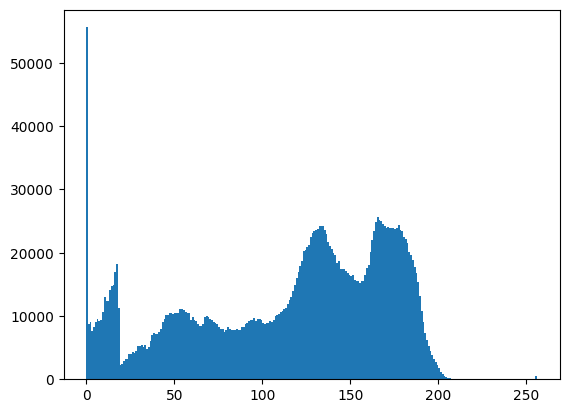

In [9]:
# plot a histogram
plt.hist(image.ravel(), bins=256, range=[0,256])
plt.show()

In [10]:
# loading the path of the train images

path = 'C:/Users/nerik/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray/train'
train = os.listdir(path)

# Print the folders name
folders=[]
folders = [f for f in sorted(os.listdir(path))]
print(folders)

['1_NORMAL', '2_BACTERIA', '3_VIRUS']


In [11]:
labels = folders
print (f'The labels are {labels}')

# setting the size of images that we want

image_size = 256

The labels are ['1_NORMAL', '2_BACTERIA', '3_VIRUS']


In [12]:
# defining a function to load images and labels together
# this function will also resize the images

def load_train(path):

    images = []
    labels_list = []

    for label in labels:
        direc = os.path.join(path, label)
        class_num = labels.index(label)

        for image in os.listdir(direc):
            image_read = cv.imread(os.path.join(direc,image),cv.IMREAD_GRAYSCALE)
            image_resized = cv.resize(image_read,(image_size,image_size))
            images.append(image_resized)
            labels_list.append(class_num)

    return np.array(images), np.array(labels_list)

In [13]:
#load all the training images to train_images

train_images, train_labels = load_train(path)

print(f'Shape of the training images = {train_images.shape}')
print(f'Shape of the training labels = {train_labels.shape}')

Shape of the training images = (5216, 256, 256)
Shape of the training labels = (5216,)


In [14]:
X = train_images
y = train_labels

print(f'Length of X = {len(X)}')
print(f'Length of y = {len(y)}')
print(f'Shape of X = {X.shape}')
print(f'Shape of y = {y.shape}')

Length of X = 5216
Length of y = 5216
Shape of X = (5216, 256, 256)
Shape of y = (5216,)


Number of Normal images = 1341
Number of Bacteria images = 2530
Number of Virus images = 1345


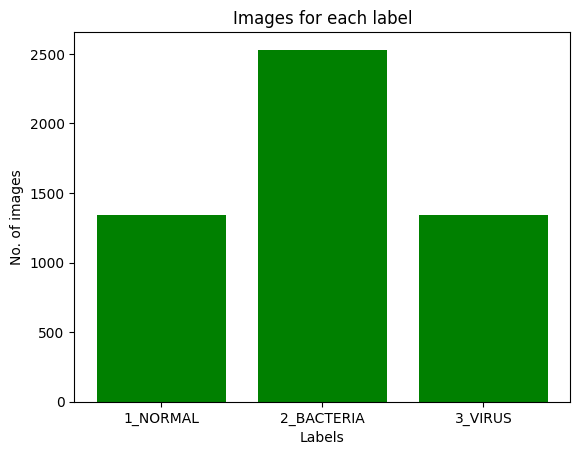

In [15]:
# checking the number of images of each class

a = 0
b = 0
c = 0

for label in y:
    if label == 0:
        a += 1
    if label == 1:
        b += 1
    if label == 2:
        c += 1

print (f'Number of Normal images = {a}')
print (f'Number of Bacteria images = {b}')
print (f'Number of Virus images = {c}')


# plotting the data

x_pos = [i for i, _ in enumerate(labels)]
numbers = [a,b,c]
plt.bar(x_pos,numbers,color = 'green')
plt.xlabel("Labels")
plt.ylabel("No. of images")
plt.title("Images for each label")

plt.xticks(x_pos, labels)

plt.show()

Display Random Images


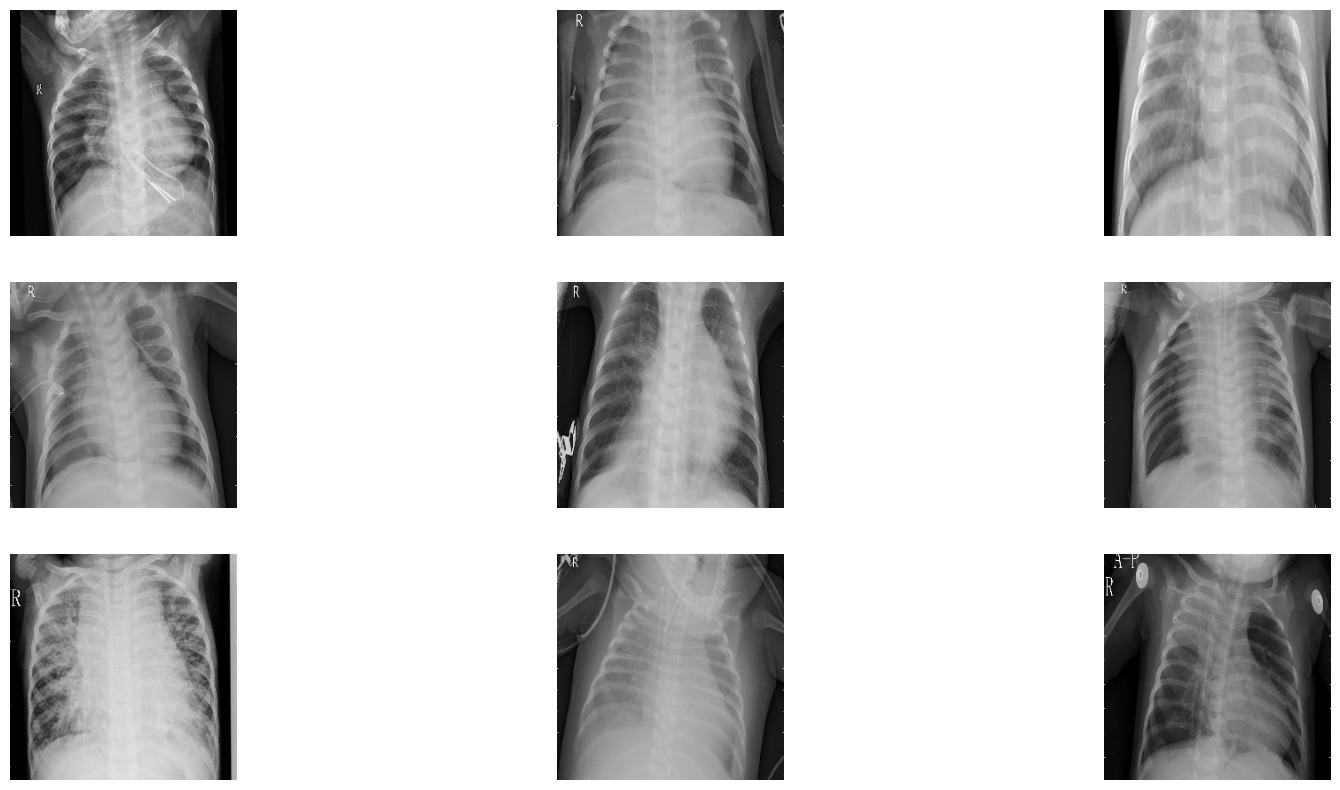

In [16]:
# Displays images
# Extract 9 random images
print('Display Random Images')

# Adjust the size of your images
plt.figure(figsize=(20,10))

for i in range(9):
    num = random.randint(0,len(X)-1)
    plt.subplot(3, 3, i + 1)

    plt.imshow(X[num],cmap='gray')
    plt.axis('off')

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 32, stratify=y)

In [20]:
#check the difference from the majority class
difference_normal = b-a
difference_virus = b-c

print(difference_normal)
print(difference_virus)

1189
1185


In [56]:
def rotate_images(image, scale =1.0, h=256, w = 256):

    center = (h/2,w/2)

    angle = random.randint(-25,25)
    M = cv.getRotationMatrix2D(center, angle, scale)
    rotated = cv.warpAffine(image, M, (h,w))
    return rotated

def flip(image):

    flipped = np.fliplr(image)
    return flipped

def translation(image):

    if image is None:
        raise ValueError("Image is None. Check your image input.")

    x= random.randint(-50,50)
    y = random.randint(-50,50)
    rows,cols,z = image.shape
    M = np.float32([[1,0,x],[0,1,y]])

    print(f'The M is{M}')
    print(f'The image value is{image}')
    print(f'The cols is{cols}')
    print(f'The rows is{rows}')

    translate = cv.warpAffine(image,M,(cols,rows))

    return translate

def blur(image):

    x = random.randrange(1,5,2)
    blur = cv.GaussianBlur(image,(x,x),cv.BORDER_DEFAULT)
    return blur

In [57]:
def apply_aug(image):

    number = random.randint(1,4)

    if number == 1:
        image= rotate_images(image, scale =1.0, h=256, w = 256)

    if number == 2:
        image= flip(image)

    if number ==3:
        image= translation(image)

    if number ==4:
        image= blur(image)

    return image

In [58]:
def oversample_images (difference_normal,difference_virus, X_train, y_train):

    normal_counter = 0
    virus_counter= 0
    new_normal = []
    new_virus = []
    label_normal = []
    label_virus = []

    for i,item in enumerate (X_train):

        if y_train[i] == 0 and normal_counter < difference_normal:

            image = apply_aug(item)

            normal_counter = normal_counter+1
            label = 0

            new_normal.append(image)
            label_normal.append(label)


        if y_train[i] == 2 and virus_counter < difference_virus:

            image = apply_aug(item)

            virus_counter = virus_counter+1
            label =2

            new_virus.append(image)
            label_virus.append(label)


    new_normal = np.array(new_normal)
    label_normal = np.array(label_normal)
    new_virus= np.array(new_virus)
    label_virus = np.array(label_virus)

    print(f'The new normal is {new_normal}')
    print(f'The new virus is {new_virus}')
    print(f'The label virus is {label_virus}')
    print(f'The new label is {label_normal}')

    return new_normal, label_normal, new_virus, label_virus

In [59]:
n_images,n_labels,v_images,v_labels =oversample_images(difference_normal,difference_virus,X_train,y_train)
print(n_images.shape)
print(n_labels.shape)
print(v_images.shape)
print(v_labels.shape)

ValueError: not enough values to unpack (expected 3, got 2)

In [28]:
# Extract 9 random images
print('Display Random Images')

# Adjust the size of your images
plt.figure(figsize=(20,10))

for i in range(9):
    num = random.randint(0,len(n_images)-1)
    plt.subplot(3, 3, i + 1)

    plt.imshow(n_images[num],cmap='gray')
    plt.axis('off')

# Adjust subplot parameters to give specified padding
plt.tight_layout()

Display Random Images


NameError: name 'n_images' is not defined

<Figure size 2000x1000 with 0 Axes>

In [ ]:
# Displays 9 generated viral images
# Extract 9 random images
print('Display Random Images')

# Adjust the size of your images
plt.figure(figsize=(20,10))

for i in range(9):
    num = random.randint(0,len(v_images)-1)
    plt.subplot(3, 3, i + 1)

    plt.imshow(v_images[num],cmap='gray')
    plt.axis('off')

# Adjust subplot parameters to give specified padding
plt.tight_layout()

In [ ]:
new_labels = np.append(n_labels,v_labels)
y_new_labels = np.expand_dims(new_labels, axis=1)
x_new_images = np.append(n_images,v_images,axis=0)

X_train1 = np.append(X_train,x_new_images,axis=0)
y_train1 = np.append(y_train,y_new_labels)

print(X_train1.shape)
print(y_train1.shape)

In [ ]:
bacteria_new=0
virus_new=0
normal_new =0

for i in y_train1:

    if i==0:
        normal_new = normal_new+1
    elif i==1 :
        bacteria_new = bacteria_new+1
    else:
        virus_new=virus_new+1

print ('Number of Normal images =',normal_new)
print ('Number of Bacteria images = ',bacteria_new)
print ('Number of Virus images =',virus_new)

# plotting the data

xe = [i for i, _ in enumerate(labels)]

numbers = [normal_new, bacteria_new, virus_new]
plt.bar(xe,numbers,color = 'green')
plt.xlabel("Labels")
plt.ylabel("No. of images")
plt.title("Images for each label")

plt.xticks(xe, labels)

plt.show()